# Herron Topic 1 - Web Data, Log and Simple Returns, and Portfolio Math

This notebook covers three topics:

1. How to download web data with the yfinance, pandas-datareader, and requests-cache packages
1. How to calculate log and simple returns
1. How to calculate portfolio returns

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

## Web Data

We will typically use the yfinance and pandas-datarader packages (combined with the requests-cache package) to download data from the web.

- If you followed my instructions to install Anaconda on your computer, you have already installed these packages
- If you use DataCamp Workspace or Binder, I have already installed these packages
- If you use Notheastern's Open OnDemand, they are working on my request, and you will have to install these packages every login by running the following in a code cell: `%pip install yfinance pandas-datareader requests-cache`

### The yfinance Package

The [yfinance package](https://github.com/ranaroussi/yfinance) provides "a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance."
Other packages provide similar functionality, but yfinance is best.
We will use the [requests-cache package](https://github.com/requests-cache/requests-cache) to cache our data downloads locally.
This local cache lets us reduce the number of times we ask the Yahoo! Finance application programming interface (API).

In [4]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after=1)

We can download data for the MATANA stocks (Microsoft, Alphabet, Tesla, Amazon, Nvidia, and Apple).
We can pass tickers as either a space-delimited string or a list of strings.

In [5]:
tickers = yf.Tickers(tickers='MSFT GOOG TSLA AMZN NVDA AAPL', session=session)
histories = tickers.history(period='max', auto_adjust=False, progress=False)
histories.index = histories.index.tz_localize(None)
histories

Adj Close                                                 Close  \
                AAPL     AMZN     GOOG     MSFT     NVDA     TSLA     AAPL   
Date                                                                         
1980-12-12    0.0999      NaN      NaN      NaN      NaN      NaN   0.1283   
1980-12-15    0.0947      NaN      NaN      NaN      NaN      NaN   0.1217   
1980-12-16    0.0877      NaN      NaN      NaN      NaN      NaN   0.1127   
1980-12-17    0.0899      NaN      NaN      NaN      NaN      NaN   0.1155   
1980-12-18    0.0925      NaN      NaN      NaN      NaN      NaN   0.1189   
...              ...      ...      ...      ...      ...      ...      ...   
2023-01-30  143.0000 100.5500  97.9500 242.7100 191.6200 166.6600 143.0000   
2023-01-31  144.2900 103.1300  99.8700 247.8100 195.3700 173.2200 144.2900   
2023-02-01  145.4300 105.1500 101.4300 252.7500 209.4300 181.4100 145.4300   
2023-02-02  150.8200 112.9100 108.8000 264.6000 217.0900 188.2700 150.8200   
2023-02-03  154.8900 103.2600 105.0700 258.3100 210.5624      NaN 154.8900   

                                       ... Stock Splits                       \
               AMZN     GOOG     MSFT  ...         GOOG   MSFT   NVDA   TSLA   
Date                                   ...                                     
1980-12-12      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
1980-12-15      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
1980-12-16      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
1980-12-17      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
1980-12-18      NaN      NaN      NaN  ...          NaN    NaN    NaN    NaN   
...             ...      ...      ...  ...          ...    ...    ...    ...   
2023-01-30 100.5500  97.9500 242.7100  ...       0.0000 0.0000 0.0000 0.0000   
2023-01-31 103.1300  99.8700 247.8100  ...       0.0000 0.0000 0.0000 0.0000   
2023-02-01 105.1500 101.4300 252.7500  ...       0.0000 0.0000 0.0000 0.0000   
2023-02-02 112.9100 108.8000 264.6000  ...       0.0000 0.0000 0.0000 0.0000   
2023-02-03 103.2600 105.0700 258.3100  ...       0.0000 0.0000 0.0000    NaN   

               Volume                                             \
                 AAPL           AMZN          GOOG          MSFT   
Date                                                               
1980-12-12  469033600            NaN           NaN           NaN   
1980-12-15  175884800            NaN           NaN           NaN   
1980-12-16  105728000            NaN           NaN           NaN   
1980-12-17   86441600            NaN           NaN           NaN   
1980-12-18   73449600            NaN           NaN           NaN   
...               ...            ...           ...           ...   
2023-01-30   64015300  70691900.0000 24365100.0000 25867400.0000   
2023-01-31   65874500  66527300.0000 22306800.0000 26541100.0000   
2023-02-01   77663600  80450100.0000 26392600.0000 31259900.0000   
2023-02-02  118339000 158154200.0000 46622600.0000 39940400.0000   
2023-02-03  130069253 118655627.0000 29959465.0000 20269785.0000   

                                         
                    NVDA           TSLA  
Date                                     
1980-12-12           NaN            NaN  
1980-12-15           NaN            NaN  
1980-12-16           NaN            NaN  
1980-12-17           NaN            NaN  
1980-12-18           NaN            NaN  
...                  ...            ...  
2023-01-30 48861100.0000 230878800.0000  
2023-01-31 49801700.0000 196813500.0000  
2023-02-01 66047700.0000 213806300.0000  
2023-02-02 56427600.0000 217448300.0000  
2023-02-03 36649525.0000            NaN  

[10626 rows x 48 columns]

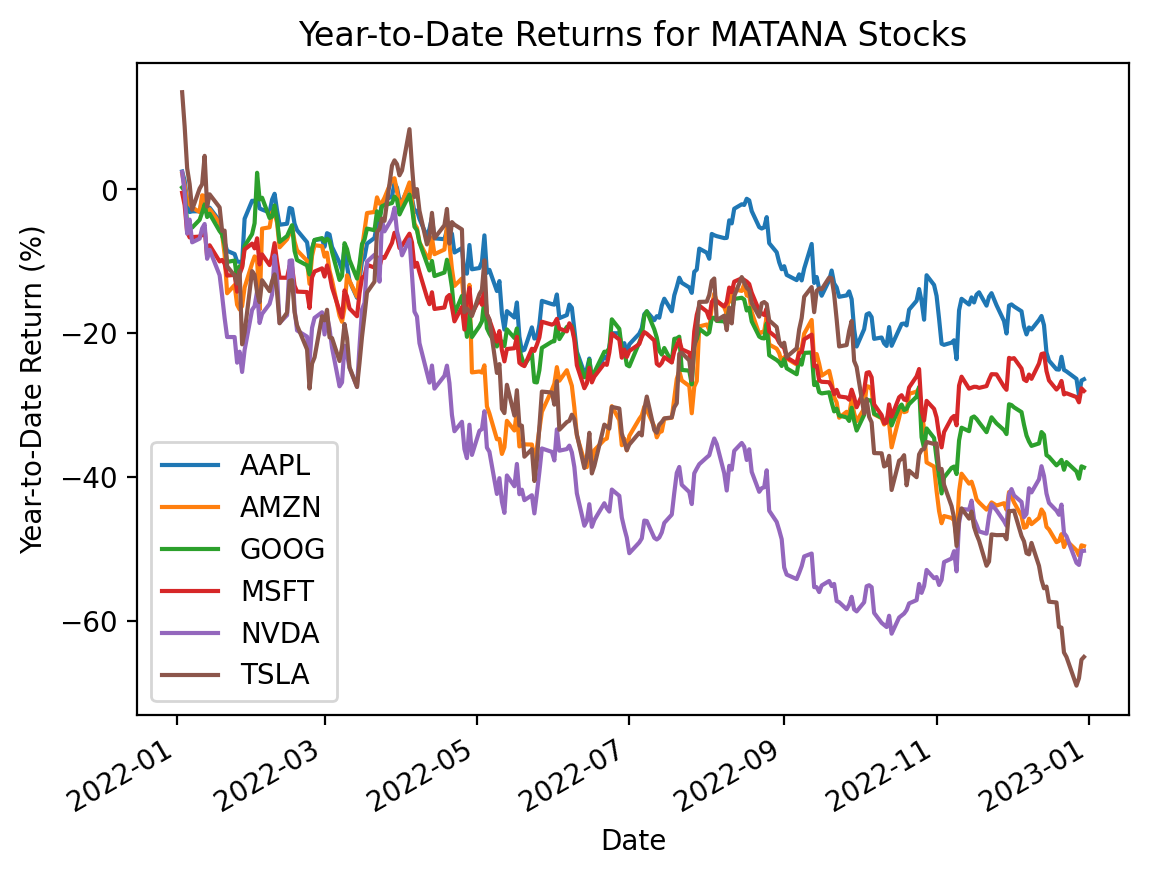

In [7]:
( # Python ignores line breaks and white space inside ()
    histories # start with MATANA data frame
    ['Adj Close'] # slice adjusted close columns
    .pct_change() # calculate simple returns
    .loc['2022'] # select 2022 returns
    .add(1) # add 1
    .cumprod() # compound cumulative returns
    .sub(1) # subtract 1
    .mul(100) # convert decimals to percent
    .plot() # plot
)
plt.ylabel('Year-to-Date Return (%)')
plt.title('Year-to-Date Returns for MATANA Stocks')
plt.show()

### The pandas-datareader package

The [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package provides easy access to various data sources, including [the Kenneth French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) and [the Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/).
The pandas-datareader package also downloads Yahoo! Finance data, but the yfinance package has better documentation.
We will use `pdr` as the abbreviated prefix for pandas-datareader.

In [8]:
import pandas_datareader as pdr

Here we download the daily benchmark factors from Ken French's Data Library.

In [11]:
pdr.famafrench.get_available_datasets(session=session)[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

For Fama and French data, pandas-datareader returns the most recent five years of data unless we specify a `start` date.
French typically provides data back through the second half of 1926.
pandas-datareader returns dictionaries of data frames, and the `'DESCR'` value describes these data frames.

In [12]:
ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900', 
    session=session
)

In [13]:
print(ff_all['DESCR'])

F-F Research Data Factors daily
-------------------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 202212 CRSP database. The Tbill return is the simple daily rate that, over the number of trading days in the month, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2022 Kenneth R. French

  0 : (25399 rows x 4 cols)


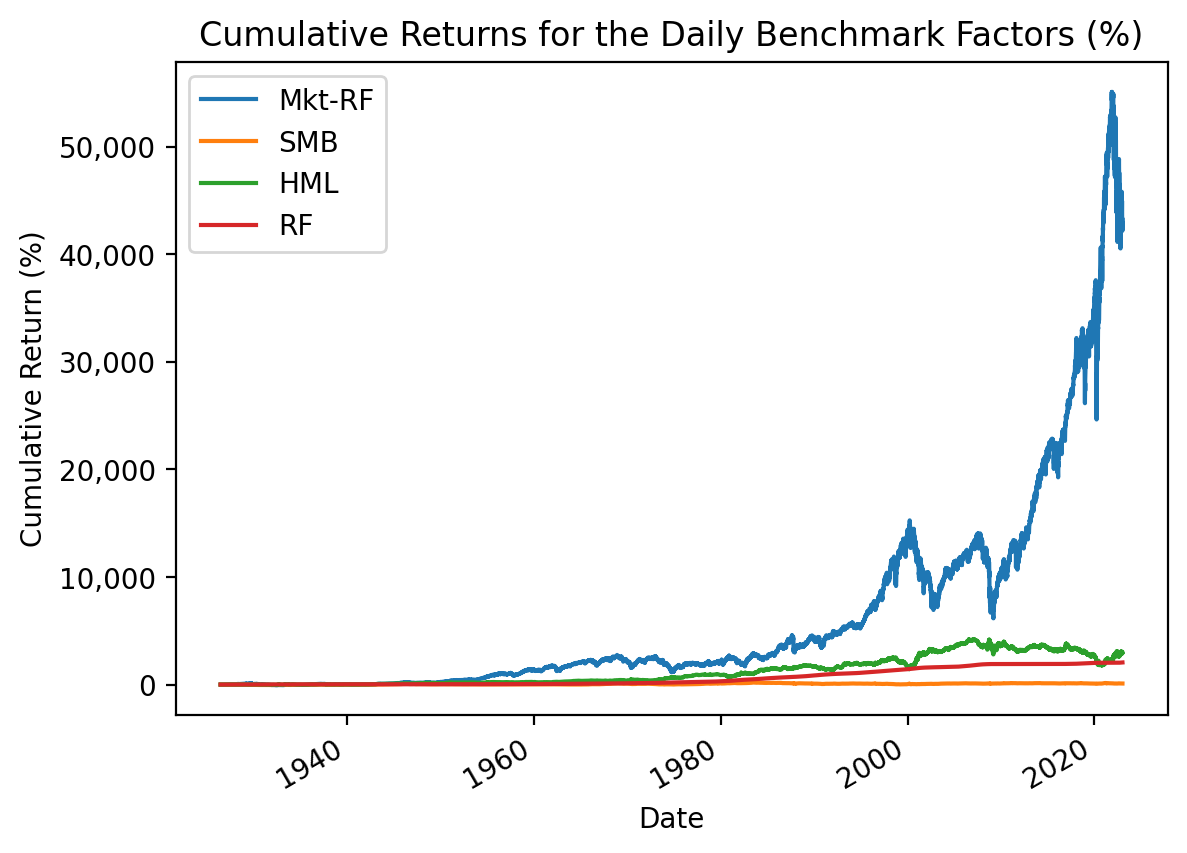

In [15]:
(
    ff_all[0]
    .div(100)
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns for the Daily Benchmark Factors (%)')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Log and Simple Returns

We will typically use *simple* returns, calculated as $R_{simple,t} = \frac{P_t + D_t - P_{t-1}}{P_{t-1}} = \frac{P_t + D_t}{P_{t-1}} - 1$.
The simple return is the return that investors receive on invested dollars.
We can calculate simple returns from Yahoo Finance data with the `.pct_change()` method on the adjusted close column (i.e., `Adj Close`), which adjusts for dividends and splits.
The adjusted close column is a reverse-engineered close price (i.e., end-of-trading-day price) that incorporates dividends and splits, making simple return calculations easy.

However, we may see *log* returns elsewhere, which are the (natural) log of one plus simple returns:

$R_{log,t} = \log(1 + R_{simple,t}) = \log\left(1 +  \frac{P_t + D_t}{P_{t-1}} - 1 \right) = \log\left(\frac{P_t + D_t}{P_{t-1}} \right) = \log(P_t + D_t) - \log(P_{t-1})$

Therefore, we calculate log returns as either the log of one plus simple returns or the difference of the logs of the adjusted close column.
Log returns are also known as *continuously-compounded* returns.

We will typically use *simple* returns instead of *log* returns.
However, this section explains the differences between simple and log returns and where each is appropriate.

### Simple and Log Returns are Similar for Small Returns

$\log(1 + x) \approx x$ for small values of $x$, so simple returns and log returns are similar for small returns.
Returns are typically small at daily and monthly horizons, so the difference between simple and log returns is small at these horizons.
The following figure shows $R_{simple,t} \approx R_{log,t}$ for small $R$s.

In [16]:
R = np.linspace(-0.75, 0.75, 100)
logR = np.log(1 + R)

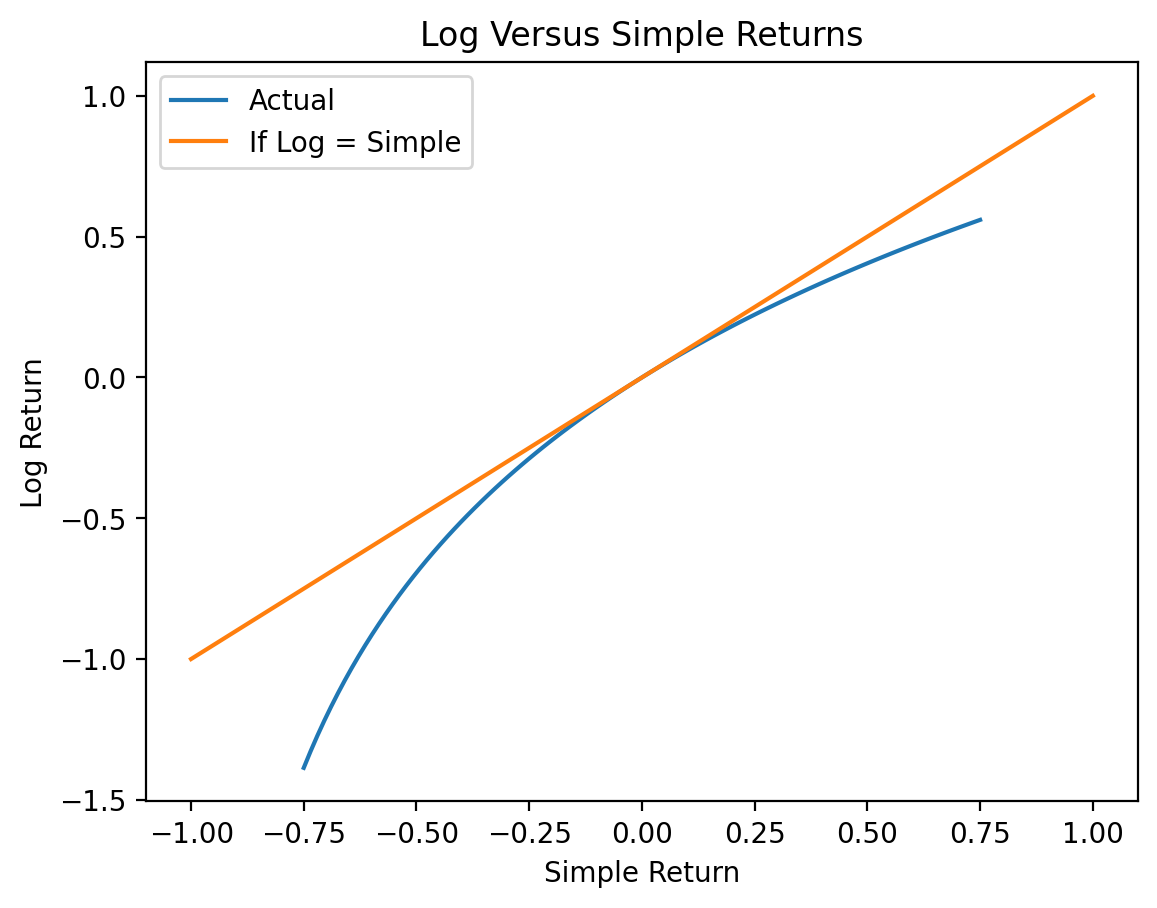

In [17]:
plt.plot(R, logR)
plt.plot([-1, 1], [-1, 1])
plt.xlabel('Simple Return')
plt.ylabel('Log Return')
plt.title('Log Versus Simple Returns')
plt.legend(['Actual', 'If Log = Simple'])
plt.show()

### Simple Return Advantage: Portfolio Calculations

We can only perform portfolio calculations with simple returns.
For a portfolio of $N$ assets with portfolio weights $w_i$, the portfolio return $R_{p}$ is the weighted average of the returns of its assets, $R_{p} = \sum_{i=1}^N w_i R_{i}$.
For two stocks with portfolio weights of 50%, our portfolio return is $R_{portfolio} = 0.5 R_1 + 0.5 R_2 = \frac{R_1 + R_2}{2}$.
However, we cannot calculate portfolio returns with log returns because the sum of logs is the log of products.

***We cannot calculate portfolio returns as the weighted average of log returns.***

### Log Return Advantage: Log Returns are Additive

The advantage of log returns is that we can compound log returns with addition.
The additive property of log returns makes code simple, computations fast, and proofs easy when we compound returns over multiple periods.

We compound returns from $t=0$ to $t=T$ as follows:

$1 + R_{0, T} = (1 + R_1) \times (1 + R_2) \times \dots \times (1 + R_T)$

Next, we take the log of both sides of the previous equation and use the property that the log of products is the sum of logs:

$\log(1 + R_{0, T}) = \log((1 + R_1) \times (1 + R_2) \times \dots \times (1 + R_T)) = \log(1 + R_1) + \log(1 + R_2) + \dots + \log(1 + R_T) = \sum_{t=1}^T \log(1 + R_t)$

Next, we exponentiate both sides of the previous equation:

$e^{\log(1 + R_{0, T})} = e^{\sum_{t=0}^T \log(1 + R_t)}$

Next, we use the property that $e^{\log(x)} = x$ to simplify the previous equation:

$1 + R_{0,T} = e^{\sum_{t=0}^T \log(1 + R_t)}$

Finally, we subtract 1 from both sides:

$R_{0 ,T} = e^{\sum_{t=0}^T \log(1 + R_t)} - 1$

So, the return $R_{0,T}$ from $t=0$ to $t=T$ is the exponentiated sum of log returns.
The pandas developers assume users understand the math above and focus on optimizing sums.

The following code generates 10,000 random log returns.
The `np.random.randn()` call generates normally distributed random numbers.
To generate equivalent simple returns, we exponentiate these log returns, then subtract one.

In [18]:
np.random.seed(42)
df = pd.DataFrame(data={'R': np.exp(np.random.randn(10000)) - 1})

In [20]:
df.describe()

,R
count,10000.0000
mean,0.6529
std,2.1918
min,-0.9802
25%,-0.4896
50%,-0.0026
75%,0.9564
max,49.7158


We can time the calculation of 12-observation rolling returns.
We use `.apply()` for the simple return version because `.rolling()` does not have a product method.
We find that `.rolling()` is slower with `.apply()` than with `.sum()` by a factor of 2,000.
***We will learn about `.rolling()` and `.apply()` in a few weeks, but they provide the best example of when to use log returns.***


In [21]:
%%timeit
df['R12_via_simple'] = (
    df['R']
    .add(1)
    .rolling(12)
    .apply(lambda x: x.prod())
    .sub(1)
)

644 ms ± 8.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
df['R12_via_log'] = (
    df['R']
    .add(1)
    .pipe(np.log)
    .rolling(12)
    .sum()
    .pipe(np.exp)
    .sub(1)
)

878 µs ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
np.allclose(df['R12_via_simple'], df['R12_via_log'], equal_nan=True)

True

These two approaches calculate the same return, but the simple-return approach is 1,000 times slower than the log-return approach!

***We can use log returns to calculate total or holding period returns very quickly!***

## Portfolio Math

Portfolio return $R_{p}$ is the weighted average of its asset returns, so $R_{p} = \sum_{i=1}^N w_i R_{i}$.
Here $N$ is the number of assets, and $w_i$ is the weight on asset $i$.

### The 1/N Portfolio

The $\frac{1}{N}$ portfolio equally weights portfolio assets, so $w_1 = w_2 = \dots = w_N = \frac{1}{N}$.
We typically rebalance the $\frac{1}{N}$ portfolio every period.
If $w_i = \frac{1}{N}$, then $R_{p} = \sum_{i=1}^N \frac{1}{N} R_{i} = \frac{\sum_{i=1}^N R_i}{N} = \bar{R}$.
Therefore, we can use `.mean()` to calculate $\frac{1}{N}$ portfolio returns.

In [24]:
returns = histories['Adj Close'].pct_change().loc['2022']

In [28]:
returns

,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2022-01-03,0.0250,0.0221,0.0027,-0.0047,0.0241,0.1353
2022-01-04,-0.0127,-0.0169,-0.0045,-0.0171,-0.0276,-0.0418
2022-01-05,-0.0266,-0.0189,-0.0468,-0.0384,-0.0576,-0.0535
2022-01-06,-0.0167,-0.0067,-0.0007,-0.0079,0.0208,-0.0215
2022-01-07,0.0010,-0.0043,-0.0040,0.0005,-0.0330,-0.0354
...,...,...,...,...,...,...
2022-12-23,-0.0028,0.0174,0.0176,0.0023,-0.0087,-0.0176
2022-12-27,-0.0139,-0.0259,-0.0209,-0.0074,-0.0714,-0.1141
2022-12-28,-0.0307,-0.0147,-0.0167,-0.0103,-0.0060,0.0331


In [26]:
returns.mean()

AAPL   -0.0010
AMZN   -0.0022
GOOG   -0.0016
MSFT   -0.0011
NVDA   -0.0020
TSLA   -0.0033
dtype: float64

In [27]:
rp_1 = returns.mean(axis=1)
rp_1

Date
2022-01-03    0.0341
2022-01-04   -0.0201
2022-01-05   -0.0403
2022-01-06   -0.0055
2022-01-07   -0.0125
               ...  
2022-12-23    0.0014
2022-12-27   -0.0423
2022-12-28   -0.0075
2022-12-29    0.0391
2022-12-30    0.0008
Length: 251, dtype: float64

***Note that when we apply the same portfolio weights every period, we rebalance at the same frequency as the returns data.***
If we have daily data, rebalance daily.
If we have monthly data, we rebalance monthly, and so on.

### A More General Solution

If we combine weights into vector $w$ and the time series of asset returns into matrix $\bf{R}$, then we can calculate the time series of portfolio returns as $R_p = w^T \bf{R}$.
The pandas version of this calculation is `R.dot(w)`, where `R` is a data frame of asset returns and `w` is a series of portfolio weights.
We can use this approach to calculate $\frac{1}{N}$ portfolio returns, too.

In [29]:
weights = np.ones(returns.shape[1]) / returns.shape[1]
weights

array([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [30]:
rp_2 = returns.dot(weights)
rp_2

Date
2022-01-03    0.0341
2022-01-04   -0.0201
2022-01-05   -0.0403
2022-01-06   -0.0055
2022-01-07   -0.0125
               ...  
2022-12-23    0.0014
2022-12-27   -0.0423
2022-12-28   -0.0075
2022-12-29    0.0391
2022-12-30    0.0008
Length: 251, dtype: float64

Both approaches give the same answer!

In [31]:
np.allclose(rp_1, rp_2, equal_nan=True)

True